Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set_style('darkgrid')

# EDA : 
Descriptive Analysis ,Data Validation,DAta consisitency

In [2]:
DataCorolla = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
DataCorolla=DataCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
DataCorolla.info()
DataCorolla.isnull().sum()
DataCorolla.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QuarterlyTax"},inplace=True)
DataCorolla.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
DataCorolla.describe()
DataCorolla["HP"].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

All the above values show that column are int type and have not null values.

In [4]:
DataCorolla.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax',
       'Weight'],
      dtype='object')

Visualisations

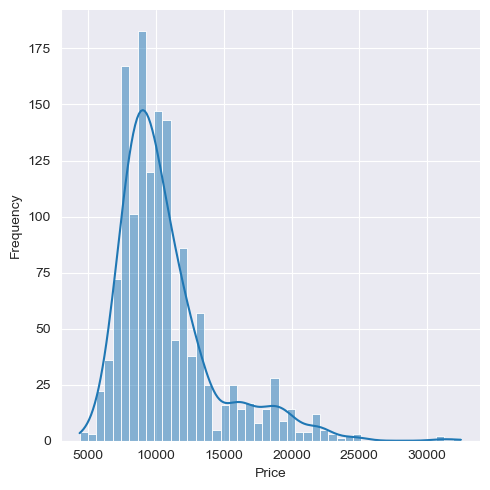

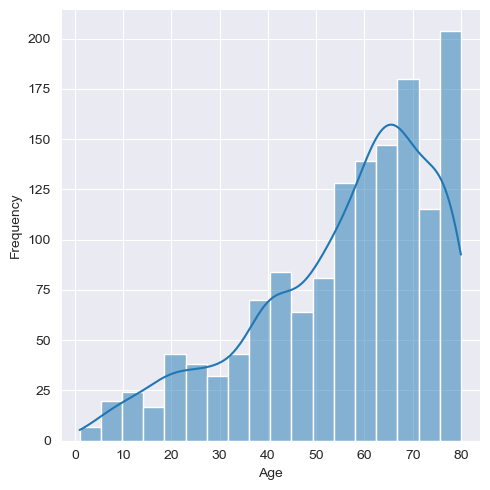

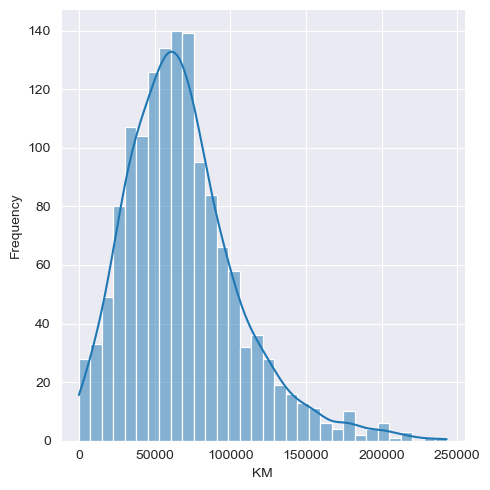

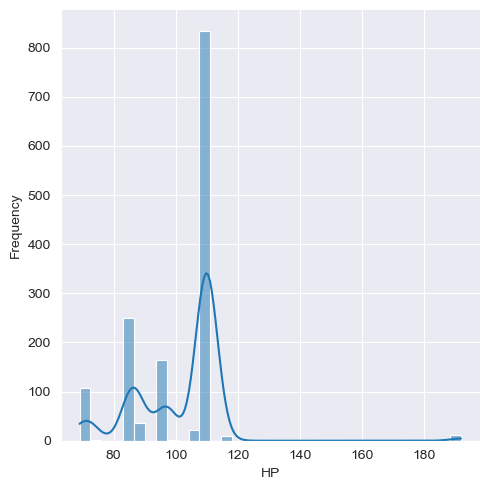

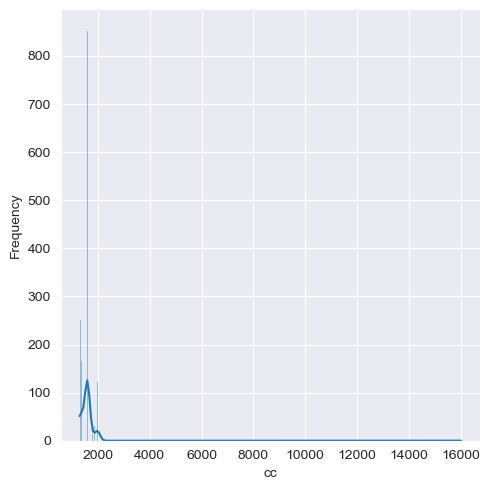

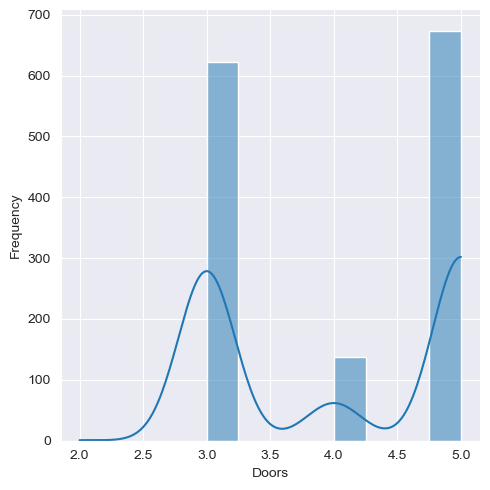

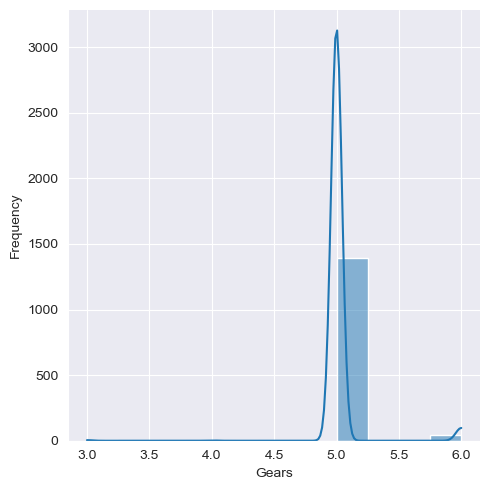

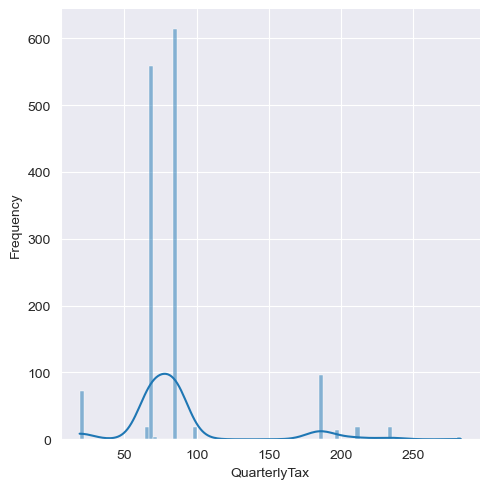

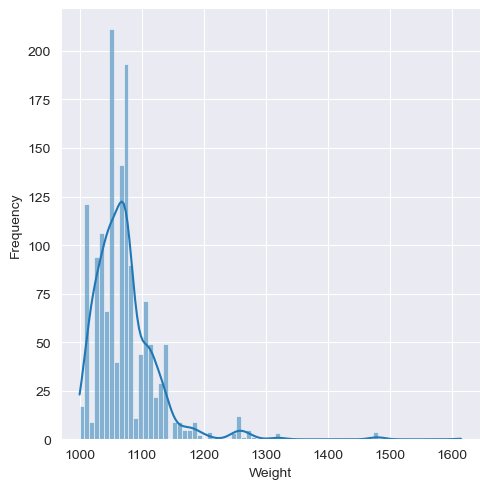

In [5]:
import warnings
warnings.filterwarnings("ignore")

for i in DataCorolla.columns:
    sns.displot(DataCorolla[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.bar
    plt.show()#xlim

# DOUBT# Checking the visuals for scaled data,
How do I get the values on the  x axis for each bar

In [6]:

# import warnings
# warnings.filterwarnings("ignore")
# scaleAlgo=MinMaxScaler()   #StandardScaler()
# scaleData=scaleAlgo.fit_transform(x)
# scaleDf=pd.DataFrame(scaleData,columns={'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax', 'Weight'})


# for i in scaleDf.columns:
#     sns.displot(scaleDf[i], kde=True,color="red")
#     plt.xlabel(i)
#     plt.ylabel('Frequency')
#     plt.bar
#     plt.show()

here the histograms show that the age data is left skewed and km,weight is right skewed,Doors and Gears show discrete values.
In PRice there are values higher than 30000 so there can be cars with such high cost as per the Domain so they are not oulier.
domain specific : From the Age graph we can say that nos of cars with age zero are sold less and nos of cars with age 75 is the maximum sold

BivariateAnalysis -Regplot

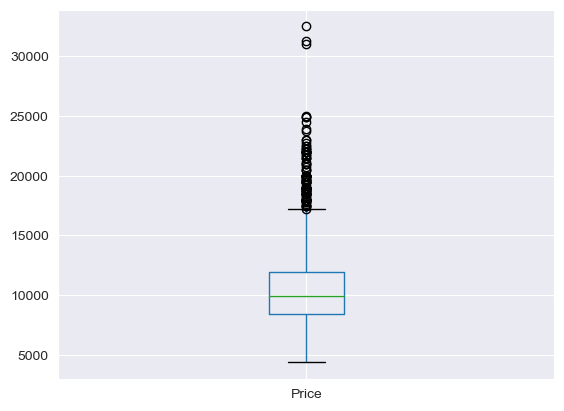

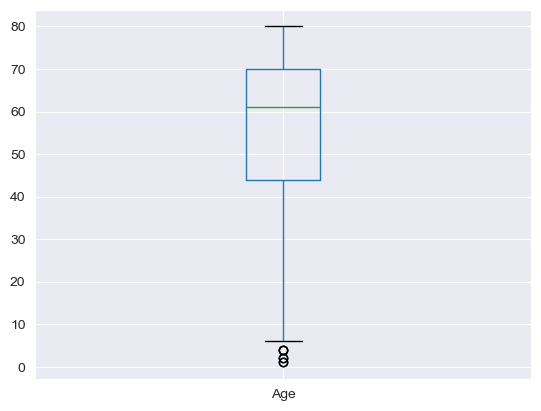

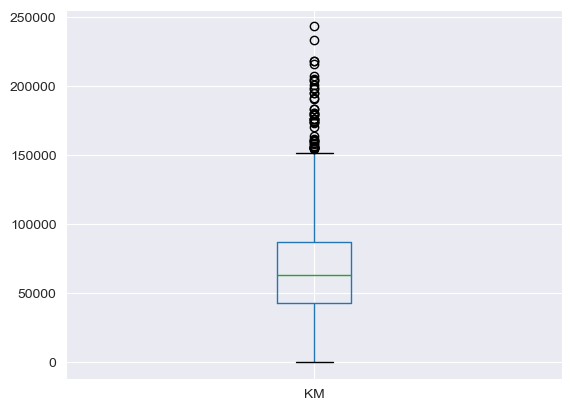

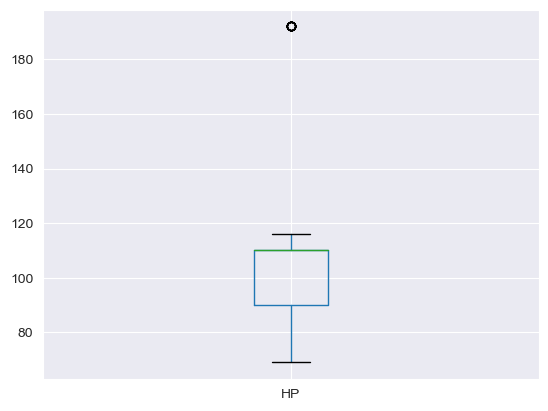

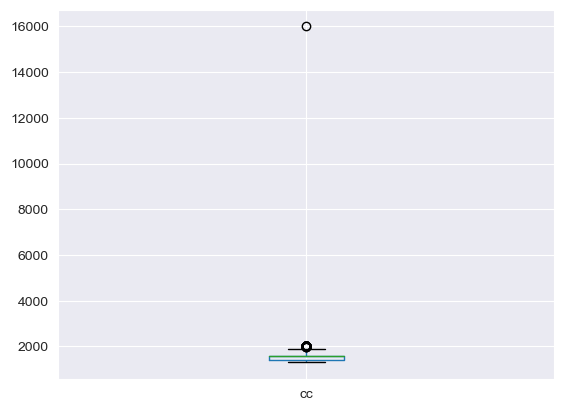

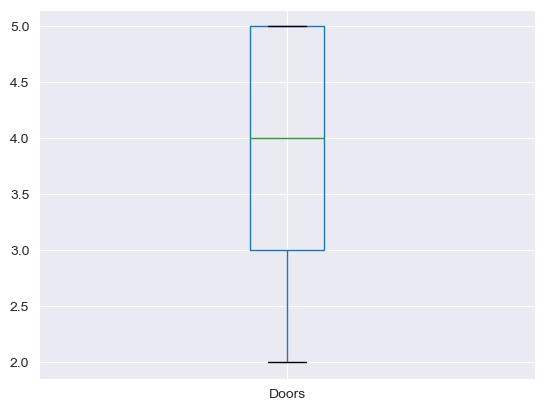

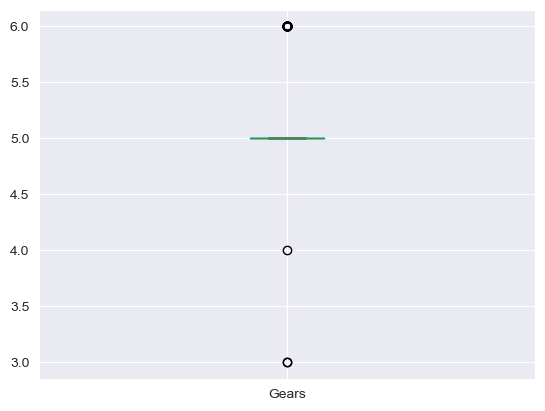

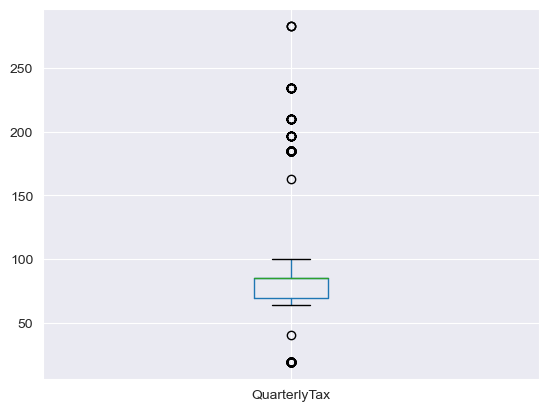

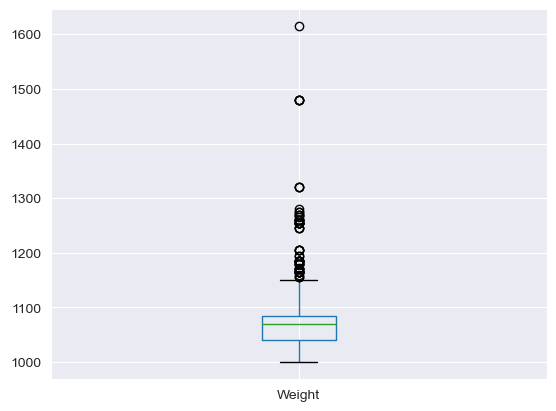

In [7]:
for column in DataCorolla:
    plt.figure()
    DataCorolla.boxplot([column])

plt.show()

In [8]:
# Identify outliers and cap them
def cap_outliers(column):
    Q1 = DataCorolla[column].quantile(0.25)
    Q3 = DataCorolla[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    DataCorolla[column] = DataCorolla[column].clip(lower_bound, upper_bound)

# Cap outliers in 'Age' column
cap_outliers('Age')

# Cap outliers in 'KM' column
cap_outliers('KM')

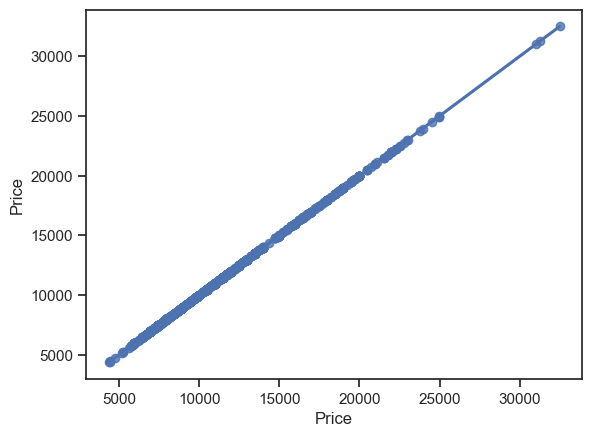

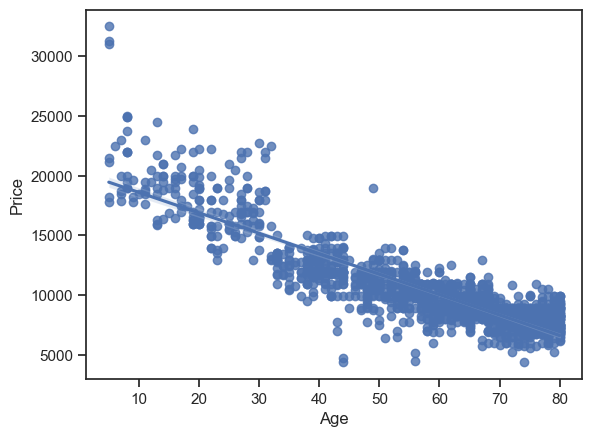

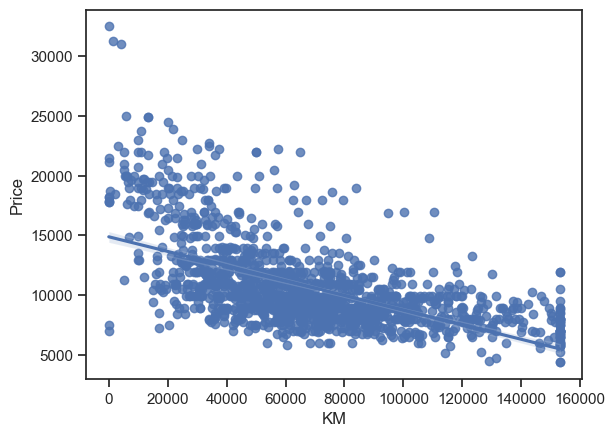

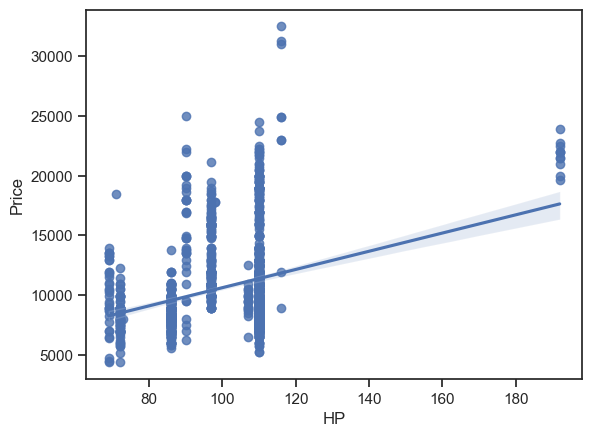

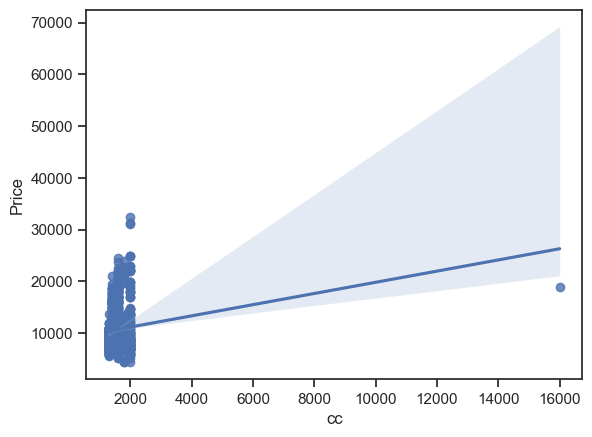

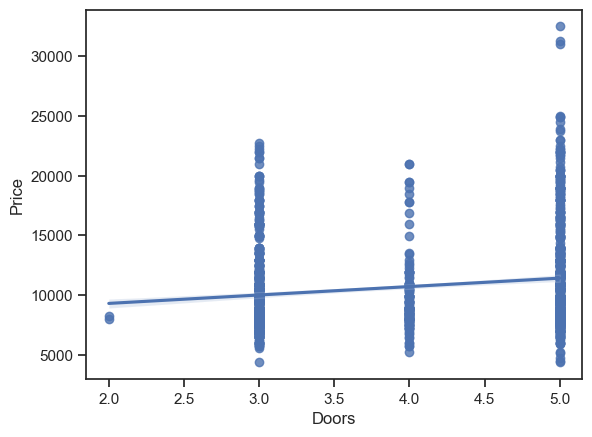

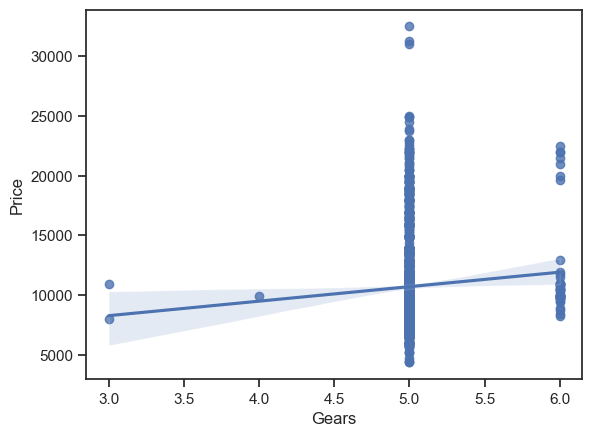

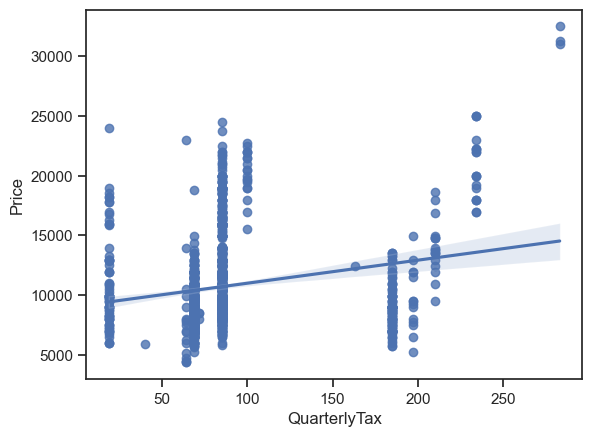

In [9]:
# Create a scatter plot with a regression line for each independent feature
sns.set(style='ticks', color_codes=True)
for column in DataCorolla.columns[:-1]:
    sns.regplot(x=column, y='Price', data=DataCorolla)
    plt.show()
# Show the plot


# DOUBT :From the regplot above as per the analysis  there is no linear relation between hp,cc,doors,gears and Quarterly trends .
So seeing this can we remove these columns since they are not contibuting .


In [10]:
sns.pairplot(DataCorolla)

In [11]:
sns.heatmap(DataCorolla.corr(),annot=True)

<AxesSubplot:>

The above matrix shows Multicollinearity doesnot exist between the independent features.So we dont no need to do the multicollinearity

In [12]:
DataCorolla.head()
DataCorolla.shape
y=DataCorolla.iloc[:,0]
y
x=DataCorolla.iloc[:,1:]
x.columns

Index(['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax', 'Weight'], dtype='object')

since the values show a huge difference hence scaling is necessary .
Note:n regression, it is often recommended to scale the features so that the predictors have a mean of 0.

# SCALING :

In [13]:
scaleAlgo=StandardScaler()
scaleData=scaleAlgo.fit_transform(x)
scaleDf=pd.DataFrame(scaleData,columns={'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax', 'Weight'})
scaleDf.describe()
# Dropping HP,CC,doors and Quaterly Tax since they are not contributing to improve the accuracy
# scaleDf.drop(columns={'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax','Weight'},inplace=True)

,Gears,cc,QuarterlyTax,Age,Doors,Weight,KM,HP
count,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03
mean,1.973043e-16,1.352988e-16,7.216450e-16,1.263628e-15,-2.610106e-16,2.557147e-16,-5.575855e-16,-2.491353e-15
std,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00
min,-2.745624e+00,-1.946752e+00,-2.170298e+00,-6.525941e-01,-2.135178e+00,-1.075361e+01,-1.656907e+00,-1.376963e+00
25%,-6.443364e-01,-7.085331e-01,-7.680418e-01,-4.168779e-01,-1.085139e+00,-1.404252e-01,-4.407850e-01,-6.168356e-01
50%,2.716096e-01,-1.213878e-01,5.674405e-01,5.455451e-02,-3.509882e-02,-1.404252e-01,-5.162591e-02,-4.674040e-02
75%,7.565221e-01,5.591084e-01,5.674405e-01,5.455451e-02,1.014941e+00,-1.404252e-01,-5.162591e-02,2.383072e-01
max,1.295314e+00,2.460571e+00,6.042918e+00,3.399769e+01,1.014941e+00,5.166169e+00,4.764218e+00,1.030999e+01


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaleDf, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1928465.2421447001


In [15]:
# Calculate the R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)


R2 score: 0.855467603906885


An R2 score of 0.855 indicates that approximately 85.5% of the variability in the target variable "Price " can be explained by the independent variables used in the model.

That means the model we have built using the independent variables ('Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax', 'Weight') is able to explain 85.5% of the variance in the 'Price' variable. A higher R2 score indicates a better fit of the model to the data.
